IndexError: index 42 is out of bounds for axis 1 with size 7

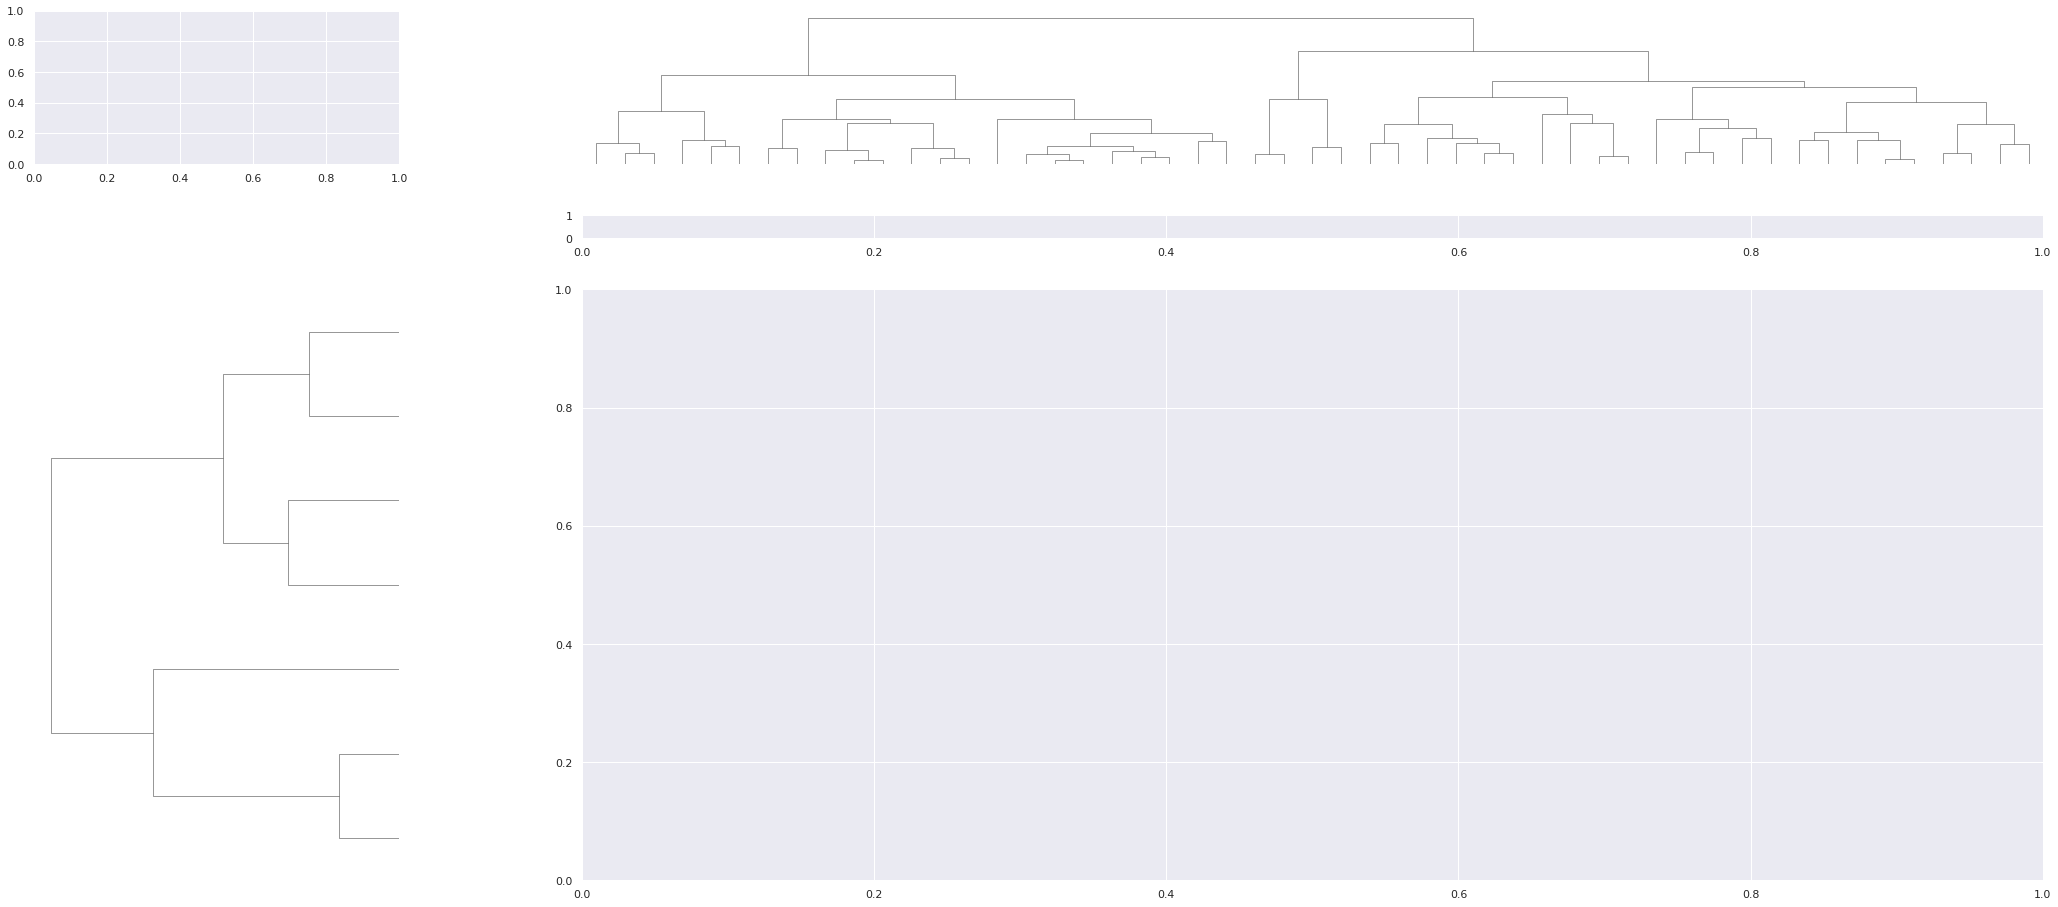

In [62]:
import pathlib
from skbio.stats.composition import clr, ilr, alr, closure, multiplicative_replacement
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(color_codes=True)
pd.options.display.min_rows = 50
results_dir = pathlib.Path("/hdd/ecoli2/Strainr_Jul2/")
dataframes = []
for f in results_dir.glob("*/*/s*"):
    dataframes.append(
        pd.read_csv(f, sep="\t", header=None, names=["strain", f.parent.stem]).set_index("strain"))
df = pd.concat(dataframes, axis=1)
df.columns = ["-".join(i.split("-")[:3]) for i in df.columns]
# remove nan and renormalize
def make_neat(df):
    df = df.rename(index={np.nan: "hi"}).drop("hi")  # drop na
    df = df / df.sum(axis=0)  # renormalize
    # df = df[df > 0.01].fillna(0) # drop those with <1% intra abundance
    df = df / df.sum(axis=0)  # renormalize
    df = df[df.sum(axis=1) > 1.0]
    df = df.sort_values(by=df.columns[0], ascending=False)
    df.loc["GCF_002983645.1 Escherichia coli O104:H4"] = (
        df.loc["GCF_002983645.1 Escherichia coli O104:H4"]
        + df.loc["GCF_000299255.1 Escherichia coli O104:H4 str. 2009EL-2050"]
    )
    df = df.drop("GCF_000299255.1 Escherichia coli O104:H4 str. 2009EL-2050")
    return df

df = make_neat(df)

df2 = pd.DataFrame(
    clr(multiplicative_replacement(df)),
    index=df.index,
    columns=df.columns,
)
sns.clustermap(
    df2.sort_values(by="GCF_002983645.1 Escherichia coli O104:H4", axis=1),
    figsize=(36, 16),
    method="complete",
    metric="cityblock",
    col_colors=row_colors
)
network_pal = sns.husl_palette(8, s=.45)
lut = dict(zip(df.index.str[:4].unique(), network_pal))
row_colors = df.index.str[:4].map(lut)


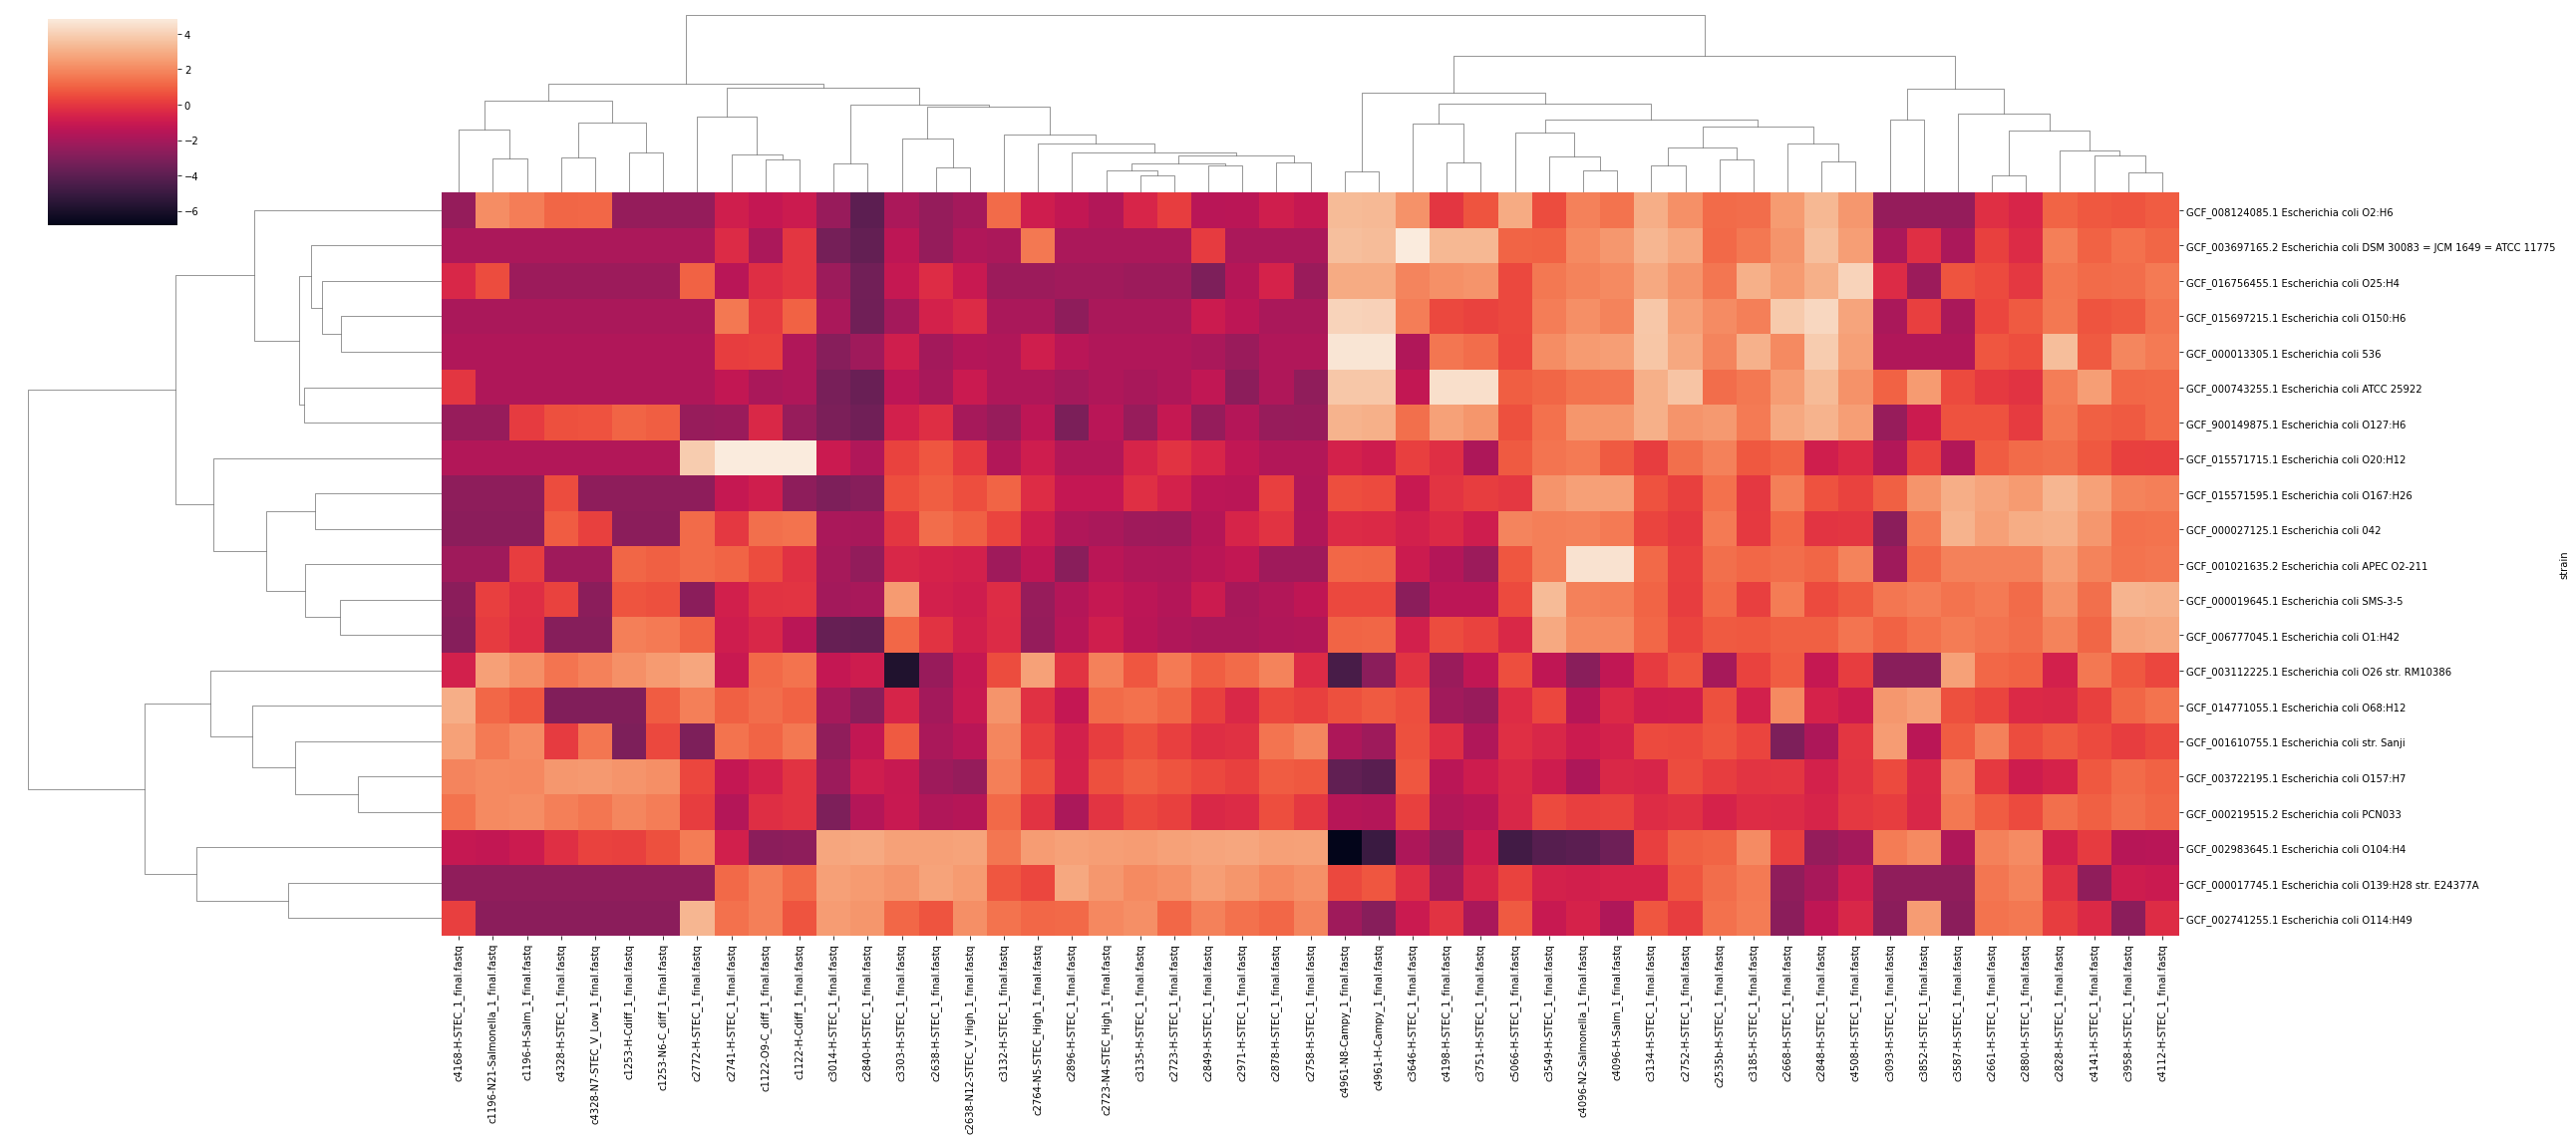

In [48]:
from skbio.stats.composition import clr,ilr,alr,closure,multiplicative_replacement
# df[df == 0] = 0.01
# vals = clr((df))
# sns.clustermap(vals)
vals = clr(multiplicative_replacement(df))
df2 = pd.DataFrame(vals,index=df.index,columns=df.columns,)
sns.clustermap(df2.sort_values(by='GCF_002983645.1 Escherichia coli O104:H4',axis=1),figsize=(36,16),method='complete',metric='euclidean')